# 모델링

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/last_data/final_bis_data.xlsx')

In [3]:
test_set = pd.DataFrame(data.loc[(data['2019_06'] > 0) | (data['2019_07'] > 0) | (data['2019_08'] > 0) | (data['2019_09'] > 0) | (data['2019_10'] > 0) | (data['2019_11'] > 0) | (data['2019_12'] > 0 )])
train_set = pd.DataFrame(data.loc[(data['2017_01'] > 0) | (data['2017_02'] > 0) | (data['2017_03'] > 0) | (data['2017_04'] > 0) | (data['2017_05'] > 0) | (data['2017_06'] > 0) | (data['2017_07'] > 0 )| (data['2017_08'] > 0 )| (data['2017_09'] > 0 )| (data['2017_10'] > 0 )| (data['2017_11'] > 0 )| (data['2017_12'] > 0 ) | (data['2018_01'] > 0) | (data['2018_02'] > 0) | (data['2018_03'] > 0) | (data['2018_04'] > 0) | (data['2018_05'] > 0) | (data['2018_06'] > 0) | (data['2018_07'] > 0 )| (data['2018_08'] > 0 )| (data['2018_09'] > 0 )| (data['2018_10'] > 0 )| (data['2018_11'] > 0 )| (data['2018_12'] > 0 ) | (data['2019_01'] > 0) | (data['2019_02'] > 0) | (data['2019_03'] > 0) | (data['2019_04'] > 0) | (data['2019_05'] > 0)])

In [4]:
train_X  = train_set.drop('G',axis = 1)
train_Y = train_set['G']

test_X = test_set.drop('G',axis = 1)
test_Y = test_set['G']

In [5]:
train_indices = train_X.index

In [6]:
train_X1 = train_X
train_X1['index_1']=train_X1.index

In [7]:
train_X1['class'] = 3

In [8]:
for i in train_indices:
    if train_X1["ER"][i] < -9.65:
        train_X1['class'][i] = 0 
    elif (train_X1["ER"][i] >= -9.65) and (train_X1["ER"][i] < -4.3) :
        train_X1['class'][i] = 1  
    elif (train_X1["ER"][i] >= -4.3) and (train_X1["ER"][i] < -0.74) :
        train_X1['class'][i] = 2 
    elif (train_X1["ER"][i] >= -0.74) and (train_X1["ER"][i] < 0.7) :
        train_X1['class'][i] = 3  
    elif (train_X1["ER"][i] >= 0.7) :
        train_X1['class'][i] = 4  

C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:

In [9]:
test_indices = test_X.index

test_X1 = test_X
test_X1['index_1']=test_X1.index

In [10]:
test_X1['class'] = 3

In [11]:
for i in test_indices:
    if test_X1["ER"][i] < -9.65:
        test_X1['class'][i] = 0 
    elif (test_X1["ER"][i] >= -9.65) and (test_X1["ER"][i] < -4.3) :
        test_X1['class'][i] = 1  
    elif (test_X1["ER"][i] >= -4.3) and (test_X1["ER"][i] < -0.74) :
        test_X1['class'][i] = 2 
    elif (test_X1["ER"][i] >= -0.74) and (test_X1["ER"][i] < 0.7) :
        test_X1['class'][i] = 3  
    elif (test_X1["ER"][i] >= 0.7) :
        test_X1['class'][i] = 4  

C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

# 산업군별 모델링

나눈 5개의 산업군으로 모델링을 진행하겠다

1차적으로 class 값을 타겟으로 두어 분류를 진행하고 이를 예측하겠다.

In [27]:
train_X2 = train_X1.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'C', 'D', 'E', 'F','H',
       '2017_01', '2017_02', '2017_03', '2017_04', '2017_05', '2017_06',
       '2017_07', '2017_08', '2017_09', '2017_10', '2017_11', '2017_12',
       '2018_01', '2018_02', '2018_03', '2018_04', '2018_05', '2018_06',
       '2018_07', '2018_08', '2018_09', '2018_10', '2018_11', '2018_12',
       '2019_01', '2019_02', '2019_03', '2019_04', '2019_05', '2019_06',
       '2019_07', '2019_08', '2019_09', '2019_10', '2019_11', '2019_12',
       'index_1'],axis = 1)

### IN (산업재)

In [28]:
train_IN = train_X2[train_X2['IN'] == 1]

# 각 피쳐들의 이상치를 제거

def outlier_indices(df,feature):
    Q1 = df[feature].quantile(.25)
    Q3 = df[feature].quantile(.75)
    IQR = Q3 - Q1
    Q2 = df[feature].quantile(.5)
    Q4 = df[feature].quantile(1)
    outlier_step = IQR * 1.5
    outlier_indices = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
    
    return outlier_indices

indices = []
for i in ['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'T', 'U', 'V',
       'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH',
       'ER']:
    indices.append(outlier_indices(train_IN,i))
    
a = []
for i in range(26):
    for j in indices[i]:
        if j in a:
            continue
        else:
            a.append(j)
            
for j in a:
    IN= train_IN.drop(j, axis = 0)

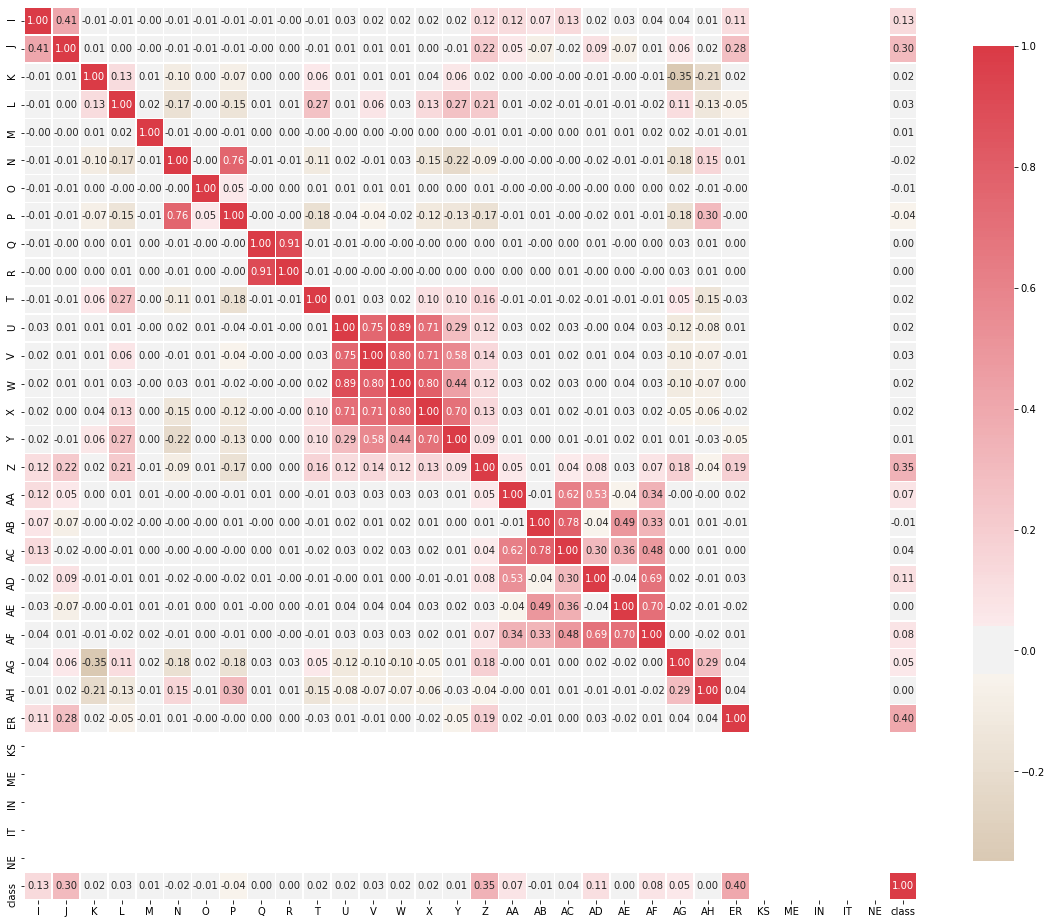

In [34]:
def corr_heatmap(var):
    correlations = IN[var].corr()
    cmap = sns.diverging_palette(50,10,as_cmap = True)
    
    fig,ax = plt.subplots(figsize = (20,20))
    sns.heatmap(correlations, cmap = cmap, vmax = 1.0, center =0, fmt= '.2f', square = True, linewidths = .5, annot = True, cbar_kws = {"shrink" : .75 })
    plt.show();

indices = IN.columns
corr_heatmap(indices)

In [43]:
IN_X = IN.drop(['ER','KS','ME','IN','IT','NE','W','class'],axis = 1)
IN_Y = pd.DataFrame(IN[['class','B','datetime']])

In [44]:
test_data = test_X1.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'C', 'D', 'E', 'F','H',
       '2017_01', '2017_02', '2017_03', '2017_04', '2017_05', '2017_06',
       '2017_07', '2017_08', '2017_09', '2017_10', '2017_11', '2017_12',
       '2018_01', '2018_02', '2018_03', '2018_04', '2018_05', '2018_06',
       '2018_07', '2018_08', '2018_09', '2018_10', '2018_11', '2018_12',
       '2019_01', '2019_02', '2019_03', '2019_04', '2019_05', '2019_06',
       '2019_07', '2019_08', '2019_09', '2019_10', '2019_11', '2019_12','index_1'],axis = 1)

test_IN = test_data[test_data['IN'] == 1]

test_IN_X = test_IN.drop(['ER','KS','ME','IN','IT','NE','W','class'],axis = 1)

test_IN_Y = pd.DataFrame(test_IN[['class','B','datetime']])

##### IN 모델링

랜덤포레스트를 통한 피쳐 셀렉션을 진행하겠다. 

그 후 여러 모델들을 비교하여, 앙상블할 모델을 선택하겠다.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler

model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
transformer = RobustScaler()
scaled_X = transformer.fit_transform(IN_X)
model.fit(scaled_X, IN_Y)

from sklearn.metrics import accuracy_score

predicted = model.predict(test_IN_X)
accuracy = accuracy_score(test_IN_Y, predicted)

print(f'Out-of-bag score estimate: {model.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Out-of-bag score estimate: 0.463
Mean accuracy score: 0.376


C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Feature ranking:
1. feature 1 (0.087873)
2. feature 15 (0.074994)
3. feature 0 (0.049892)
4. feature 21 (0.047278)
5. feature 20 (0.043935)
6. feature 17 (0.042597)
7. feature 18 (0.042190)
8. feature 4 (0.041907)
9. feature 23 (0.040390)
10. feature 22 (0.040024)
11. feature 19 (0.039187)
12. feature 12 (0.039121)
13. feature 13 (0.038606)
14. feature 9 (0.037421)
15. feature 8 (0.037099)
16. feature 11 (0.036701)
17. feature 7 (0.036383)
18. feature 3 (0.035211)
19. feature 2 (0.034960)
20. feature 14 (0.034611)
21. feature 5 (0.034382)
22. feature 6 (0.033630)
23. feature 16 (0.027891)
24. feature 10 (0.023717)


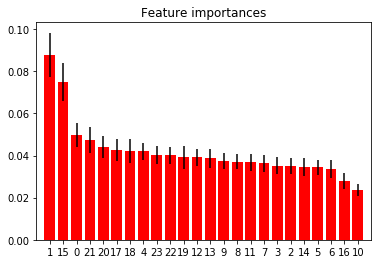

In [29]:
def feature_impt(model, x, y):
    model = model.fit(x, y)
    return model.feature_importances_

rf_impt = feature_impt(model,scaled_X, IN_Y)

# 랜덤포레스트를 통한 피쳐 임포턴스 확인

def graph_generator(model,importances, X):
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show() 

graph_generator(model, rf_impt, IN_X)

In [31]:
IN_X.columns

Index(['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'T', 'U', 'V', 'X',
       'Y', 'Z', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH'],
      dtype='object')

랜덤 포레스트를 통해 임포턴스가 0.4 이상인 10개의 피쳐를 사용해 다시 모델링 하겠다.

J, Y, I, AE, AD, AA, AB, M, AG, AF, AC

In [34]:
IN2_X = IN_X[['J', 'Y', 'I', 'AE', 'AD', 'AA', 'AB', 'M', 'AG', 'AF', 'AC']]
IN2_Y = pd.DataFrame(IN['class'])
test_IN2_X = test_IN_X[['J', 'Y', 'I', 'AE', 'AD', 'AA', 'AB', 'M', 'AG', 'AF', 'AC']]
test_IN2_Y = pd.DataFrame(test_IN_Y['class'])

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler

model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
transformer = RobustScaler()
scaled_X = transformer.fit_transform(IN2_X)
model.fit(scaled_X, IN2_Y)

from sklearn.metrics import accuracy_score

predicted = model.predict(test_IN2_X)
accuracy = accuracy_score(test_IN2_Y, predicted)

print(f'Out-of-bag score estimate: {model.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Out-of-bag score estimate: 0.446
Mean accuracy score: 0.382


### xgboost

xgboost를 통해서 정확도와 피쳐 임포턴스를 보겠다.

In [42]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 4)
xgb.fit(IN_X,IN_Y)
xgb_pred = xgb.predict(test_IN_X)
accuracy_score(test_IN_Y, xgb_pred)

0.42786479802143446

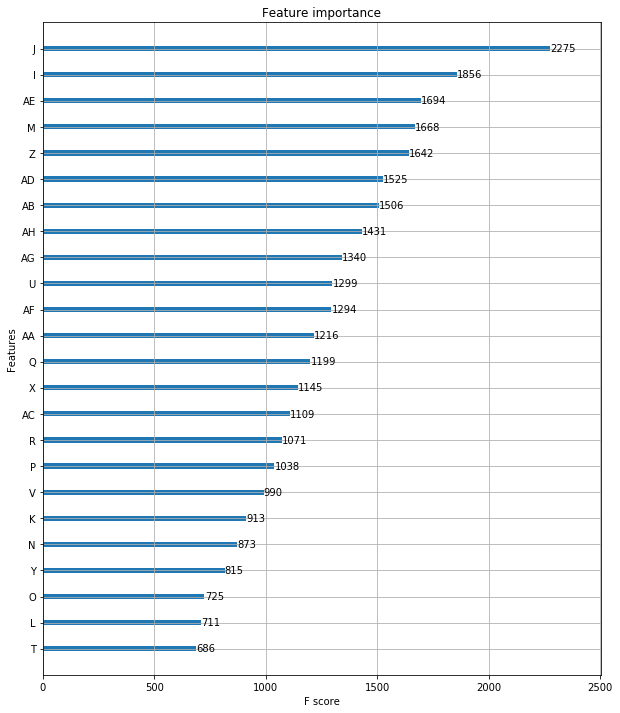

In [43]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb, ax=ax)

### 여러 모델의 정확도 비교

In [44]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import XGBClassifier

### Simple modeling

SVC

Decision Tree

XGboost


AdaBoost

Random Forest

Extra Trees

Gradient Boosting

Multiple layer perceprton (neural network)

KNN

Logistic regression

Linear Discriminant Analysis

위 12개의 모델들의 정확도를 KFold Cross Validation을 통해서 평균낼 것이다,

In [45]:
# kfold를 통한 cross val
# cross val (교차검증) : validation set을 만들어 overfitting을 막는 역할, testset을 하나로 고정하는 것이 아니라 여러개로 만든다.

kfold = StratifiedKFold(n_splits = 10)  #sklearn에서의 KFold

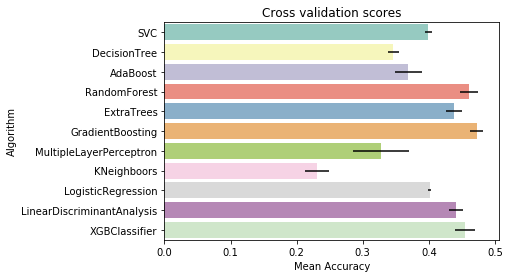

In [46]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state = random_state, learning_rate = 0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))  #extratreesclassifier : 더욱 랜덤한 randomforest
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier())

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,IN_X,y = IN_Y, scoring = 'accuracy', cv = kfold,n_jobs = -1 ))  #cross_val_score : 원하는 평가지표 평가 가능
    
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({'CrossValMeans':cv_means,'CrossValerrors':cv_std,'Algorithm':["SVC","DecisionTree", "AdaBoost","RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis",'XGBClassifier']})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res,palette='Set3',orient = 'h',**{'xerr':cv_std})
g.set_xlabel('Mean Accuracy')
g = g.set_title('Cross validation scores')

상위 4개 기법인 LinearDiscriminantAnalysis, GradientBoosting, RandomForest, XGBClassifier을 앙상블 하겠다.

In [202]:
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsRFC.fit(KS2_X,KS2_Y)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 23.0min finished
C:\Users\jlee0\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.4667590027700831

### LSTM을 통해서 주가 예측

LSTM은 주가 class나 ER 지표가 아니라 주가 자체를 사용해보겠다.

In [172]:
train_set_IN = train_set[train_set.IN == 1]
IN_X  = train_set_IN.drop(['G','Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'C', 'D', 'E', 'F','H',
       '2017_01', '2017_02', '2017_03', '2017_04', '2017_05', '2017_06',
       '2017_07', '2017_08', '2017_09', '2017_10', '2017_11', '2017_12',
       '2018_01', '2018_02', '2018_03', '2018_04', '2018_05', '2018_06',
       '2018_07', '2018_08', '2018_09', '2018_10', '2018_11', '2018_12',
       '2019_01', '2019_02', '2019_03', '2019_04', '2019_05', '2019_06',
       '2019_07', '2019_08', '2019_09', '2019_10', '2019_11', '2019_12','ER','KS','ME','IN','IT','NE','W'],axis = 1)
IN_Y = train_set_IN[['B','G','datetime']]

test_set_IN = test_set[test_set.IN == 1]
test_X = test_set_IN.drop(['G','Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'C', 'D', 'E', 'F','H',
       '2017_01', '2017_02', '2017_03', '2017_04', '2017_05', '2017_06',
       '2017_07', '2017_08', '2017_09', '2017_10', '2017_11', '2017_12',
       '2018_01', '2018_02', '2018_03', '2018_04', '2018_05', '2018_06',
       '2018_07', '2018_08', '2018_09', '2018_10', '2018_11', '2018_12',
       '2019_01', '2019_02', '2019_03', '2019_04', '2019_05', '2019_06',
       '2019_07', '2019_08', '2019_09', '2019_10', '2019_11', '2019_12','ER','KS','ME','IN','IT','NE','W'],axis = 1)
test_Y = test_set_IN[['B','G','datetime']]

In [173]:
IN_X

,B,I,J,K,L,M,N,O,P,Q,...,Z,AA,AB,AC,AD,AE,AF,AG,AH,datetime
36,A129260,0.27933,-1.508916,3.2,1.3,9.492071,0.80,0.47,0.61,17.20,...,76,0.000192,0.000000,0.000192,0.001999,0.105979,0.107978,70.00,119.148936,2017-01-01
37,A129260,0.00000,0.308642,3.2,1.3,8.594413,0.80,0.47,0.61,15.60,...,69,0.000000,0.003442,0.003442,0.002565,0.162150,0.164716,62.50,106.382979,2017-02-01
38,A129260,1.53000,4.731861,4.1,1.6,8.781055,0.80,0.47,0.61,15.90,...,70,-0.000061,0.023156,0.023096,0.035185,-0.005690,0.029495,63.75,108.510638,2017-03-01
39,A129260,-0.66000,-2.922078,4.0,1.6,10.533068,0.80,0.45,0.61,11.20,...,63,0.000000,-0.006982,-0.006982,-0.002383,-0.088874,-0.091258,56.25,100.000000,2017-04-01
40,A129260,-0.16000,0.806452,3.4,1.4,11.018845,0.80,0.47,0.61,11.70,...,66,0.000108,-0.004862,-0.004755,-0.000635,-0.035950,-0.036585,58.75,100.000000,2017-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69972,A071970,0.60000,1.300000,25.2,5.4,-23.520000,12.01,0.26,1.87,3.63,...,11,0.000000,0.000000,0.000000,-0.410000,-0.010000,-0.420000,8.00,350.000000,2019-01-01
69973,A071970,-3.40000,-9.400000,25.2,5.4,-28.270000,12.01,0.26,1.87,4.36,...,13,0.000000,0.030000,0.030000,-0.120000,0.040000,-0.080000,9.00,423.000000,2019-02-01
69974,A071970,-2.10000,1.400000,25.2,5.4,-25.650000,12.01,0.26,1.87,3.95,...,12,0.010000,-0.020000,-0.020000,-0.080000,0.060000,-0.020000,8.00,385.000000,2019-03-01
69975,A071970,-1.40000,-1.700000,-68.0,-18.5,14.120000,12.01,0.26,1.78,-1.56,...,14,0.000000,0.030000,0.030000,0.000000,0.200000,0.200000,9.00,408.000000,2019-04-01


In [174]:
IN_Y

,B,G,datetime
36,A129260,3590,2017-01-01
37,A129260,3250,2017-02-01
38,A129260,3320,2017-03-01
39,A129260,2990,2017-04-01
40,A129260,3125,2017-05-01
...,...,...,...
69972,A071970,5450,2019-01-01
69973,A071970,6550,2019-02-01
69974,A071970,5940,2019-03-01
69975,A071970,5820,2019-04-01


In [175]:
IN_X[IN_X.B == 'A129260']

,B,I,J,K,L,M,N,O,P,Q,...,Z,AA,AB,AC,AD,AE,AF,AG,AH,datetime
36,A129260,0.27933,-1.508916,3.2,1.3,9.492071,0.8,0.47,0.61,17.20,...,76,0.000192,0.000000,0.000192,0.001999,0.105979,0.107978,70.00,119.148936,2017-01-01
37,A129260,0.00000,0.308642,3.2,1.3,8.594413,0.8,0.47,0.61,15.60,...,69,0.000000,0.003442,0.003442,0.002565,0.162150,0.164716,62.50,106.382979,2017-02-01
38,A129260,1.53000,4.731861,4.1,1.6,8.781055,0.8,0.47,0.61,15.90,...,70,-0.000061,0.023156,0.023096,0.035185,-0.005690,0.029495,63.75,108.510638,2017-03-01
39,A129260,-0.66000,-2.922078,4.0,1.6,10.533068,0.8,0.45,0.61,11.20,...,63,0.000000,-0.006982,-0.006982,-0.002383,-0.088874,-0.091258,56.25,100.000000,2017-04-01
40,A129260,-0.16000,0.806452,3.4,1.4,11.018845,0.8,0.47,0.61,11.70,...,66,0.000108,-0.004862,-0.004755,-0.000635,-0.035950,-0.036585,58.75,100.000000,2017-05-01
41,A129260,-0.31000,0.934579,3.4,1.4,48.831902,0.8,0.47,0.60,14.40,...,69,0.000000,-0.014723,-0.014723,-0.006734,-0.024174,-0.030908,62.50,106.382979,2017-06-01
42,A129260,2.37000,2.204724,3.4,1.4,48.882557,0.8,0.47,0.60,14.50,...,69,0.001357,0.009075,0.010432,0.011613,0.022386,0.033999,62.50,106.382979,2017-07-01
43,A129260,-0.63000,-2.006173,3.4,1.4,48.882557,0.8,0.47,0.60,14.10,...,67,-0.000529,-0.005273,-0.005802,0.018984,-0.027793,-0.008809,61.25,104.255319,2017-08-01
44,A129260,-3.07000,-5.071315,3.4,1.4,-284.774907,0.8,0.45,0.60,13.20,...,63,0.001459,-0.025344,-0.023885,0.001212,-0.079870,-0.078658,56.25,100.000000,2017-09-01
45,A129260,0.83000,-1.136364,3.4,1.4,-289.569098,0.8,0.46,0.60,13.40,...,65,-0.000375,-0.009086,-0.009461,-0.000375,-0.034013,-0.034389,57.50,100.000000,2017-10-01


In [176]:
IN_Y[0:29]

,B,G,datetime
36,A129260,3590,2017-01-01
37,A129260,3250,2017-02-01
38,A129260,3320,2017-03-01
39,A129260,2990,2017-04-01
40,A129260,3125,2017-05-01
41,A129260,3240,2017-06-01
42,A129260,3245,2017-07-01
43,A129260,3175,2017-08-01
44,A129260,2995,2017-09-01
45,A129260,3045,2017-10-01


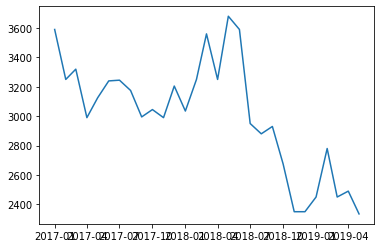

In [177]:
import matplotlib.pyplot as plt

x = IN_X[0:29].datetime
y = IN_Y[0:29]['G']
plt.plot(x, y)

In [178]:
# window 만들기. 3개월을 기준으로 사용할 것이며, many to one 방식을 이용할 것이다.

IN_X_1 = IN_X[IN_X.B == 'A129260']
IN_X_1 = IN_X_1.drop(['B','datetime'],axis = 1)
IN_Y_1 = IN_Y[IN_Y.B == 'A129260']
IN_Y_1 = IN_Y_1.drop(['B','datetime'],axis = 1)

window_len = 3

LSTM_training_inputs = []

for i in range(len(IN_X_1)-window_len+1):
    temp_set = IN_X_1[i:(i+window_len)].copy()
    
    LSTM_training_inputs.append(temp_set)
    
LSTM_training_outputs = np.array(IN_Y_1)

LSTM_training_inputs = np.array(LSTM_training_inputs)

In [179]:
# test 데이터 만들기

test_IN_X_1 = test_IN_X[test_IN_X.B == 'A129260']
test_IN_X_1 = test_IN_X_1.drop(['B','datetime'],axis = 1)
test_IN_Y_1 = test_IN_Y[test_IN_Y.B == 'A129260']
test_IN_Y_1 = test_IN_Y_1.drop(['B','datetime'],axis = 1)

window_len = 3
LSTM_test_inputs = []

for i in range(len(test_IN_X_1)-window_len+1):
    temp_set = test_IN_X_1[i:(i+window_len)].copy()
    
    LSTM_test_inputs.append(temp_set)

LSTM_test_outputs = np.array(test_IN_Y_1)

LSTM_test_inputs = np.array(LSTM_test_inputs)

In [182]:
# 처음 2달의 결과는 제외 시켜준다.

y_train = LSTM_training_outputs[2:29]
len(y_train)

27

In [209]:
y_train = np.asarray(y_train).astype('float32')

In [210]:
y_train

array([[3320.],
       [2990.],
       [3125.],
       [3240.],
       [3245.],
       [3175.],
       [2995.],
       [3045.],
       [2990.],
       [3205.],
       [3035.],
       [3250.],
       [3560.],
       [3250.],
       [3680.],
       [3590.],
       [2950.],
       [2880.],
       [2930.],
       [2675.],
       [2350.],
       [2350.],
       [2450.],
       [2780.],
       [2450.],
       [2490.],
       [2335.]], dtype=float32)

In [183]:
y_test = LSTM_test_outputs[2:29]
len(y_test)

5

In [213]:
y_test = np.asarray(y_test).astype('float32')

In [199]:
len(LSTM_test_inputs)

5

In [205]:
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_absolute_error

# LSTM 모델링

def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.10, loss="mae", optimizer="adam"):
    
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [206]:
nn_model = build_model(LSTM_training_inputs, output_size=1, neurons = 32)

In [211]:
nn_history = nn_model.fit(LSTM_training_inputs, y_train, 
                            epochs=5, batch_size=1, verbose=2, shuffle=True)

Epoch 1/5
27/27 - 0s - loss: 2975.2969
Epoch 2/5
27/27 - 0s - loss: 2975.0032
Epoch 3/5
27/27 - 0s - loss: 2974.8560
Epoch 4/5
27/27 - 0s - loss: 2974.8152
Epoch 5/5
27/27 - 0s - loss: 2974.5356


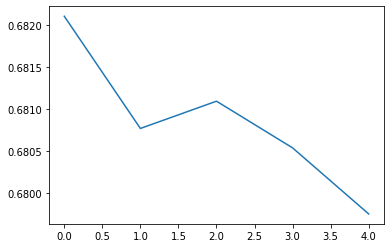

In [216]:
plt.plot(nn_model.predict(LSTM_test_inputs), label = "predicted")

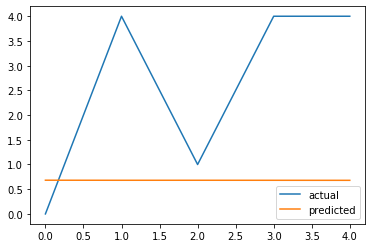

The Mean Absolute Error is: 2.191993236541748


In [219]:
plt.plot(y_test, label = "actual")
plt.plot(nn_model.predict(LSTM_test_inputs), label = "predicted")
plt.legend()
plt.show()
MAE = mean_absolute_error(y_test, nn_model.predict(LSTM_test_inputs))
print('The Mean Absolute Error is: {}'.format(MAE))

In [203]:
nn_model.predict(LSTM_test_inputs)

array([[0.00196962],
       [0.00196962],
       [0.00196962],
       [0.00196962],
       [0.00196962]], dtype=float32)